<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [5]:
# your code goes here

# plt.figure(figsize=(10, 6))
# # plt.hist(tr, bins=30, color='skyblue', edgecolor='black') 
# sns.histplot(data=df, x='ConvertedComp', kde=True)
# plt.title('Distribution of Converted Compensation')
# plt.xlabel('Frequency')
# plt.ylabel('Converted Compensation')
# plt.grid(True)
# plt.show()

29.0

Plot the histogram for the column `ConvertedComp`.


AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

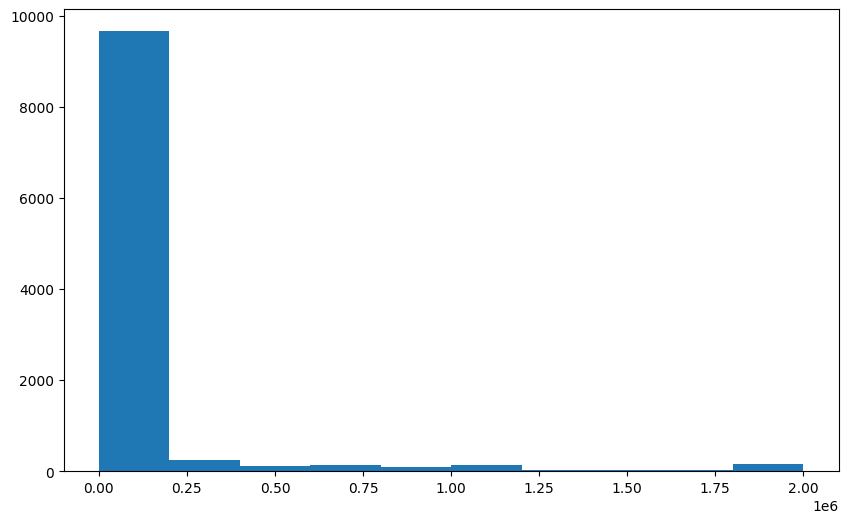

In [20]:
# your code goes here

plt.figure(figsize=(10, 6))
# plt.hist(tr, bins=30, color='skyblue', edgecolor='black') 
plt.hist(data=df, x='ConvertedComp', kde=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Frequency')
plt.ylabel('Converted Compensation')
plt.grid(True)
# plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median = df['ConvertedComp'].median()
median

57745.0

How many responders identified themselves only as a **Man**?


In [28]:
# your code goes here
man = df['Gender'] == 'Man'
man.value_counts()
# print("Number of Men:", man.sum())

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [31]:
# your code goes here

women = df[df['Gender'] == 'Woman']
wmn_med = women['ConvertedComp'].median()
print('Median ConvertedComp for Women:', wmn_med)

Median ConvertedComp for Women: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [35]:
# your code goes here
age = df['Age']
age.describe()
# age.info()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


[4276 5525 1115  186    8    0    1]
[16.         27.85714286 39.71428571 51.57142857 63.42857143 75.28571429
 87.14285714 99.        ]


<Axes: ylabel='Frequency'>

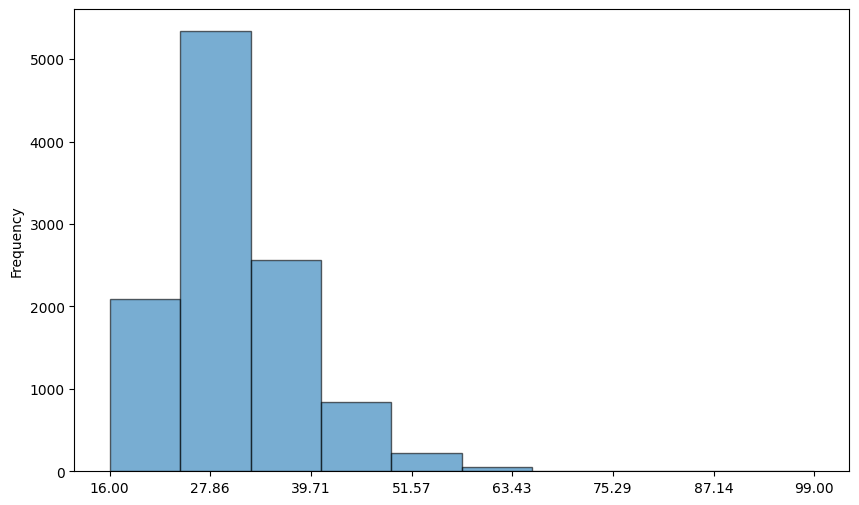

In [76]:
# your code goes here

df_age = df['Age'].dropna()

count, bin_edges = np.histogram(df_age, 7)
print(count)
print(bin_edges)

# plt.figure(figsize= (10, 6))
# sns.histplot(data=df, x='Age', kde=True, bins=bin_edges, linewidth=2, color='skyblue', edgecolor='black', alpha=0.7)
df_age.plot(kind ='hist', 
          figsize=(10, 6),
          # bins=5,
          alpha=0.6,
          xticks=bin_edges,
          edgecolor= 'black'
          # color=['coral', 'darkslateblue', 'mediumseagreen']
         )
# plt.title('Distribution of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.tight_layout() 
# plt.grid()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: xlabel='ConvertedComp'>

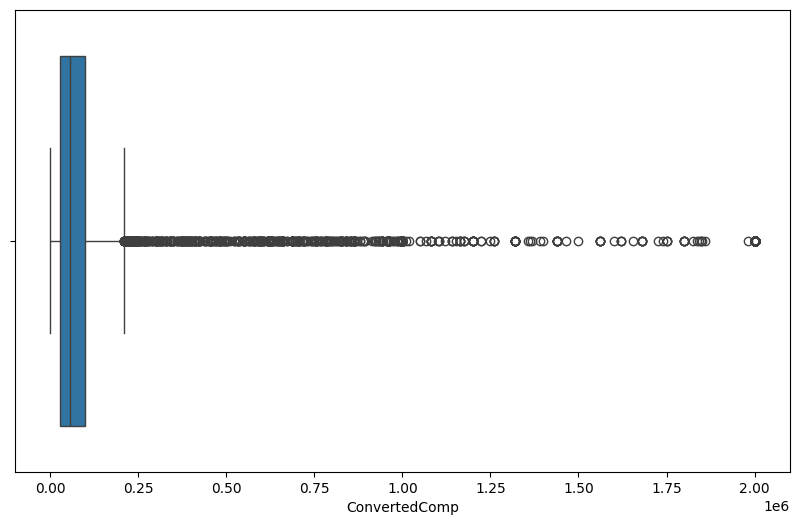

In [82]:
# Find any outliers in the 'ConvertedComp' column using a boxplot

# your code goes here:
df_converted_comp = df['ConvertedComp']

# df_converted_comp.plot(kind='bar', figsize=(10,6))

plt.figure(figsize=(10,6))
sns.boxplot(x=df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [91]:
# your code goes here

# df['ConvertedComp'].describe()
lower = df['ConvertedComp'].describe()['25%']
upper = df['ConvertedComp'].describe()['75%']
print('IQR:', lower, '-->', upper)

IQR: 26868.0 --> 100000.0


Find out the upper and lower bounds.


In [92]:
# find the upper and lower bounds

# your code goes here:
min = df['ConvertedComp'].describe()['min']
max = df['ConvertedComp'].describe()['max']

print('lower-bound:', min)
print('Upper-bound:',max)

lower-bound: 0.0
Upper-bound: 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [8]:
# Identify how many outliers are there in the 'ConvertedComp' column

# your code goes here:

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers in 'ConvertedComp' column:", num_outliers)


Number of outliers in 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [10]:
# Create new dataframe by removing the outliers from 'ConvertedComp' column

# your code goes here

df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
hj = df_no_outliers['ConvertedComp'].mean()
hj
# print("Shape of original dataframe:", df.shape)
# print("Number of outliers in 'ConvertedComp' column:", num_outliers)
# print("Shape of dataframe without outliers:", df_no_outliers.shape)


59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [102]:
# Find the correlation between 'Age' and all other numerical columns

# your code goes here

numeric_df = df.select_dtypes(include=['int64', 'float64'])
age_corr = numeric_df.corr()['Age']
age_corr

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
